# Krajjat demo

## Preparation

### Importations

In [1]:
import os.path as op
from krajjat.classes.sequence import Sequence
from krajjat.classes.audio import Audio
from krajjat.classes.subject import Subject
from krajjat.classes.experiment import Experiment
from krajjat.display_functions import *
from krajjat.plot_functions import *
from krajjat.analysis_functions import *

pygame 2.5.1 (SDL 2.28.2, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


### Path definition

In [2]:
path_parent = "D:/OneDrive/Documents/BCBL/05_BodyLingual/Stimuli/Recordings/Retellings/"
path_original = path_parent + "Gesture/02_Trimmed_original_gesture/"
path_videos = path_parent + "Audiovisual/03_Normalized_audiovisual/Normalized_bodies/"
path_audios = path_parent + "Audio/04_Trimmed_audio/"
path_preprocessed = path_parent + "Gesture/02_Preprocessed_gesture/"
path_outputs = "D:/OneDrive/Bureau/"

subject = "05_Larraitz"
recording = "R034"

path_sequence = op.join(path_original, subject, recording)
path_video = op.join(path_videos, subject, recording)
path_audio = op.join(path_audios, subject, recording)
#path_sequence_preprocessed = op.join(path_preprocessed, subject, recording)
#sequence1_preprocessed = Sequence(path_sequence_preprocessed + ".xlsx")

## Display a sequence

In [3]:
sequence1 = Sequence(path_sequence)

Fetching sequence files... 725 pose file(s) found.
Opening sequence from D:/OneDrive/Documents/BCBL/05_BodyLingual/Stimuli/Recordings/Retellings/Gesture/02_Trimmed_original_gesture/05_Larraitz\R034... 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% - Done.


In [ ]:
sequence_reader(sequence1)

### Add the video and the audio

In [ ]:
sequence_reader(sequence1, 
                path_video = path_video + ".mp4",
                path_audio = path_audio + ".wav")

### Showing them side by side

In [ ]:
sequence_reader(sequence1, 
                path_video = path_video + ".mp4",
                path_audio = path_audio + ".wav",
                position_video = "side")

## Removing the jitter

In [4]:
sequence1_corrected = sequence1.correct_jitter(velocity_threshold = 0.5,
                                               window = 250,
                                               window_unit = "ms")

Correcting jumps and twitches... 
	Creating an empty sequence... 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% - Done.
	Performing realignment... 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% - Done.
De-jittering over. 1991 point(s) corrected over 15225 (13.1%).
864 jump(s) and 235 twitch(es) corrected.



In [ ]:
sequence_reader(sequence1_corrected, 
                path_video = path_video + ".mp4",
                path_audio = path_audio + ".wav",
                position_video = "side")

In [ ]:
sequence_comparer(sequence1, 
                  sequence1_corrected, 
                  position_sequences = "side",
                  path_video = path_video + ".mp4",
                  path_audio = path_audio + ".wav",
                  zoom_level = 2.9,
                  shift = (-290, -167),
                  size_joint_hand = 30,
                  size_joint_default = 15,
                  size_joint_head = 50,
                  width_line = 6,
                  color_joint_default = "dark blue",
                  color_line = "light blue")
# Poses 156 - 160 good example

## Resampling

In [ ]:
sequence1_corrected.print_stats()

In [ ]:
framerate_plotter(sequence1_corrected)

In [5]:
sequence1_resampled = sequence1_corrected.resample(12)

Resampling the sequence at 12 Hz (mode: cubic)...
	Original framerate: 
		Average: 11.9 · Min: 5.63 · Max: 15.19
	Creating vectors... 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% - Done.
	Performing the resampling... 	Resampling the array at 12 Hz (mode: cubic)...
		Performing the resampling... 100% - Done.
		The original array had 725 samples.
		The new array has 730 samples.
	Resampling the array at 12 Hz (mode: cubic)...
		Performing the resampling... 100% - Done.
		The original array had 725 samples.
		The new array has 730 samples.
	Resampling the array at 12 Hz (mode: cubic)...
		Performing the resampling... 100% - Done.
		The original array had 725 samples.
		The new array has 730 samples.
	Resampling the array at 12 Hz (mode: cubic)...
		Performing the resampling... 100% - Done.
		The original array had 725 samples.
		The new array has 730 samples.
	Resampling the array at 12 Hz (mode: cubic)...
		Performing the resampling... 100% - Done.
		The original array had 725 samples.
		The

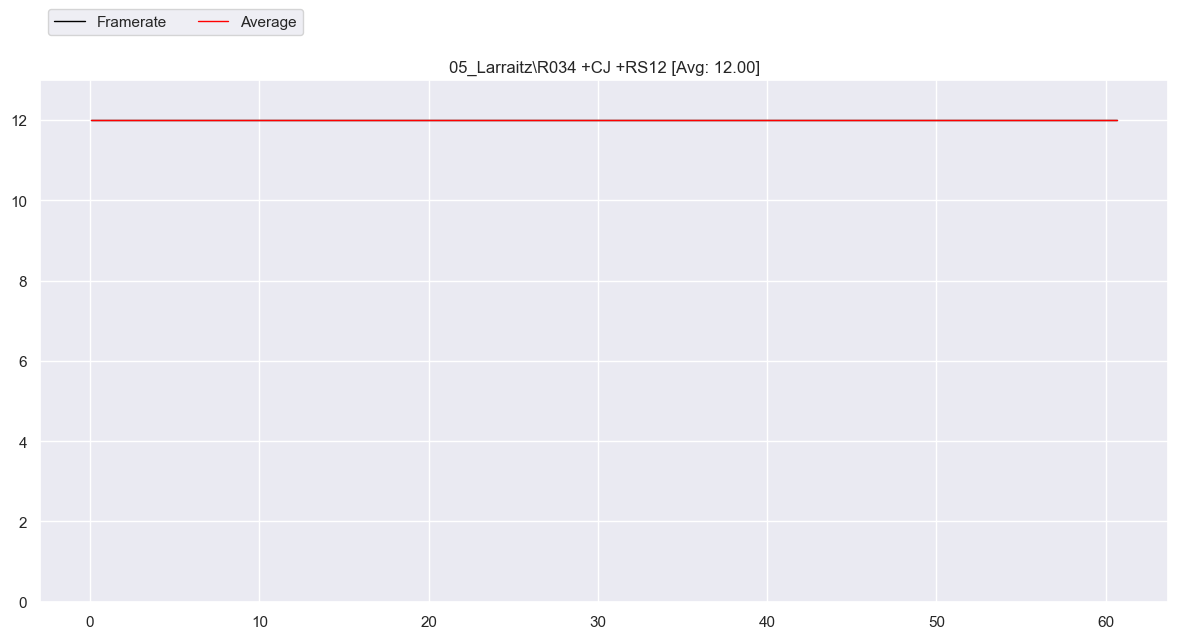

In [6]:
framerate_plotter(sequence1_resampled)

In [ ]:
sequence_comparer(sequence1_corrected, 
                  sequence1_resampled, 
                  show_joints_corrected = False,
                  position_sequences = "side",
                  path_video = path_video + ".mp4",
                  path_audio = path_audio + ".wav",
                  zoom_level = 2.9,
                  shift = (-290, -167),
                  size_joint_hand = 30,
                  size_joint_default = 15,
                  size_joint_head = 50,
                  width_line = 6,
                  color_joint_default = "dark blue",
                  color_line = "light blue")

## Re-referencing

Plotting the data skeleton for the sequence 05_Larraitz\R034 +CJ +RS12...
	Getting data... Done.
	Calculating colors... Done.
	Scaling the audio... Done.
	Creating the sub-graphs... Done.


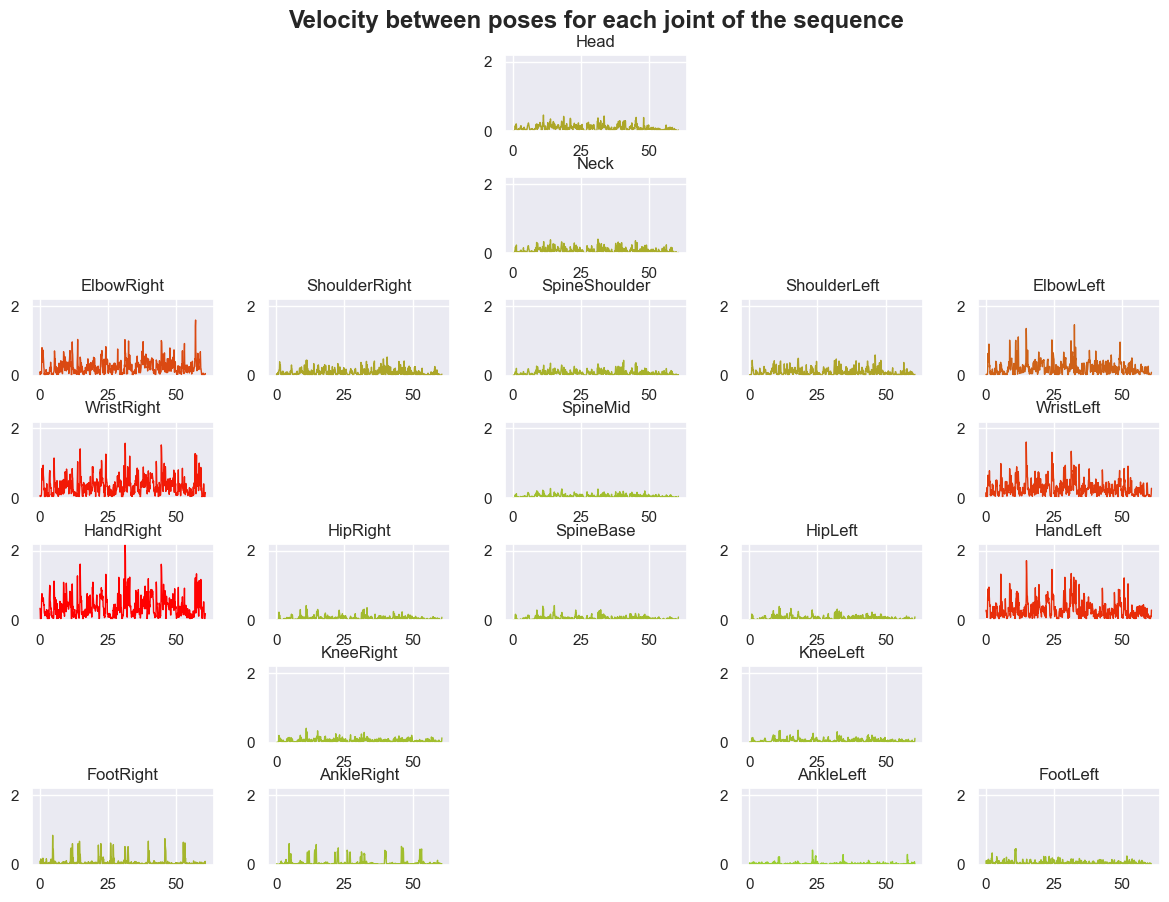

In [7]:
joints_movement_plotter(sequence1_resampled, "velocity")

In [ ]:
sequence1_rereferenced = sequence1_resampled.re_reference("Head")

In [ ]:
joints_movement_plotter(sequence1_rereferenced, "velocity")

### Trimming

In [ ]:
sequence1_trimmed = sequence1_rereferenced.trim(5, 15)

In [ ]:
sequence_reader(sequence1_trimmed)

### Scrambling

In [ ]:
sequence1_randomized = sequence1_trimmed.randomize()

In [ ]:
sequence_reader(sequence1_randomized,
                show_lines = False,
                show_joints_corrected = False)

In [ ]:
save_video_sequence(sequence1_randomized, 
                    path_output = path_outputs + "randomized.mp4",
                    resolution = (960, 540),
                    zoom_level = 3.2,
                    shift = (-351, -190),
                    color_joint_default = "bcbl blue",
                    show_lines = False,
                    show_joints_corrected = False)

## Analyzing

In [ ]:
joints_movement_plotter(sequence1_rereferenced, "distance_x")

In [ ]:
single_joint_movement_plotter(sequence1_rereferenced, "HandRight", timestamp_start = 10, timestamp_end = 11)

### Save our work

In [ ]:
sequence1_rereferenced.save(path_outputs + "sequence1.xlsx")

## Add the audio

In [ ]:
audio1 = Audio(path_audio + ".wav")

In [ ]:
audio1.print_details()

In [ ]:
audio1_envelope = audio1.get_envelope(filter_over=50)

In [ ]:
audio1_resampled = audio1_envelope.resample(12)

In [ ]:
joints_movement_plotter(sequence1_rereferenced, 
                        time_series = "x", 
                        audio_or_derivative = audio1_resampled, 
                        overlay_audio = True)

In [ ]:
audio_plotter(audio1, 50, 3)

In [ ]:
subject1 = Subject(subject)
subject1.add_sequence(sequence1_rereferenced)
subject1.add_audio(audio1_resampled)

In [ ]:
experiment = Experiment()
experiment.add_subject(subject1)

In [ ]:
correlation_with_audio(experiment, 
                       sequence_metric="velocity",
                       audio_metric="envelope", 
                       title=None, 
                       color_scheme="celsius", 
                       color_background="white",
                       color_silhouette="black",
                       resolution=0.5,
                       path_save=None)